In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("2020_sharing_data_outside.csv",encoding='utf8')
pd.set_option('display.max_columns',None)

In [3]:
data.head()

,is.python.main,other.lang.None,other.lang.Java,other.lang.JavaScript,other.lang.C/C++,other.lang.PHP,other.lang.C#,other.lang.Ruby,other.lang.Bash / Shell,other.lang.Objective-C,other.lang.Go,other.lang.Visual Basic,other.lang.Scala,other.lang.SQL,other.lang.Kotlin,other.lang.R,other.lang.Swift,other.lang.Clojure,other.lang.Perl,other.lang.Rust,other.lang.Groovy,other.lang.TypeScript,other.lang.CoffeeScript,other.lang.HTML/CSS,other.lang.Other,python.years,years.of.coding,main.purposes,other.purposes.Educational purposes,other.purposes.Data analysis,other.purposes.DevOps / System administration / Writing automation scripts,other.purposes.Software testing / Writing automated tests,other.purposes.Software prototyping,other.purposes.Web development,other.purposes.Machine learning,other.purposes.Mobile development,other.purposes.Desktop development,other.purposes.Computer graphics,other.purposes.Network programming,other.purposes.Game development,other.purposes.Multimedia applications development,other.purposes.Embedded development,other.purposes.Programming of web parsers / scrapers / crawlers,other.purposes.Other,how.involved.Computer graphics,how.involved.Data analysis,how.involved.DevOps / System administration / Writing automation scripts,how.involved.Educational purposes,how.involved.Software testing / Writing automated tests,how.involved.Web development,how.involved.Network programming,how.involved.Desktop development,how.involved.Machine learning,how.involved.Software prototyping,how.involved.Programming of web parsers / scrapers / crawlers,how.involved.Embedded development,how.involved.Mobile development,how.involved.Game development,how.involved.Multimedia applications development,use.python.most,are.you.datascientist,python.version.most,python2.version.most,python3.version.most,python.version.upgrade.I don’t update,python.version.upgrade.Somebody else manages Python updates for me,python.version.upgrade.Python_org,python.version.upgrade.Build from source,python.version.upgrade.Automatic upgrade via cloud provider,python.version.upgrade.Anaconda,python.version.upgrade.ActivePython,python.version.upgrade.Intel Distribution for Python,"python.version.upgrade.OS-provided Python (via apt-get, yum, homebrew, etc_)",python.version.upgrade.pyenv,python.version.upgrade.pythonz,python.version.upgrade.I use Docker containers,python.version.upgrade.Other,isolate.environments.None,isolate.environments.Virtualenv,isolate.environments.Pipenv,isolate.environments.Poetry,isolate.environments.Conda,isolate.environments.Docker,isolate.environments.Vagrant / virtual machines,isolate.environments.Other,web.frameworks.None,web.frameworks.Django,web.frameworks.web2py,web.frameworks.Bottle,web.frameworks.CherryPy,web.frameworks.Flask,web.frameworks.Hug,web.frameworks.Pyramid,web.frameworks.Tornado,web.frameworks.Falcon,web.frameworks.FastAPI,web.frameworks.Other,data.frameworks.None,data.frameworks.PyTorch,data.frameworks.NumPy,data.frameworks.SciPy,data.frameworks.Pandas,data.frameworks.Matplotlib,data.frameworks.Seaborn,data.frameworks.SciKit-Learn,data.frameworks.Keras,data.frameworks.TensorFlow,data.frameworks.Theano,data.frameworks.NLTK,data.frameworks.MXNet,data.frameworks.Gensim,data.frameworks.Other,other.frameworks.None,other.frameworks.Requests,other.frameworks.aiohttp,other.frameworks.PyQT,other.frameworks.PyGTK,other.frameworks.wxPython,other.frameworks.Pillow,other.frameworks.Tkinter,other.frameworks.Pygame,other.frameworks.Twisted,other.frameworks.Asyncio,other.frameworks.Kivy,other.frameworks.Six,other.frameworks.Scrapy,other.frameworks.Other,cloud.platform.None,cloud.platform.Google Cloud Platform,cloud.platform.AWS,cloud.platform.Microsoft Azure,cloud.platform.Rackspace,cloud.platform.Heroku,cloud.platform.DigitalOcean,cloud.platform.Linode,cloud.platform.PythonAnywhere,cloud.platform.OpenShift,cloud.platform.OpenStack,cloud.platform.Other,run.in.cloud.None of the following,run.in.cloud.In virtual machines,run.in.cloud.Within

Checking the sparsity of the dataset:

In [4]:
len(data)

54462

In [5]:
data.isnull().sum()

is.python.main              12730
other.lang.None             48060
other.lang.Java             46353
other.lang.JavaScript       37800
other.lang.C/C++            42839
                            ...  
job.role.CIO / CEO / CTO    53142
job.role.Systems analyst    53099
job.role.Other              51867
age                         29701
country.live                29735
Length: 264, dtype: int64

The dataset is characterised by large number of missing values for each feature.

#### Examining features:

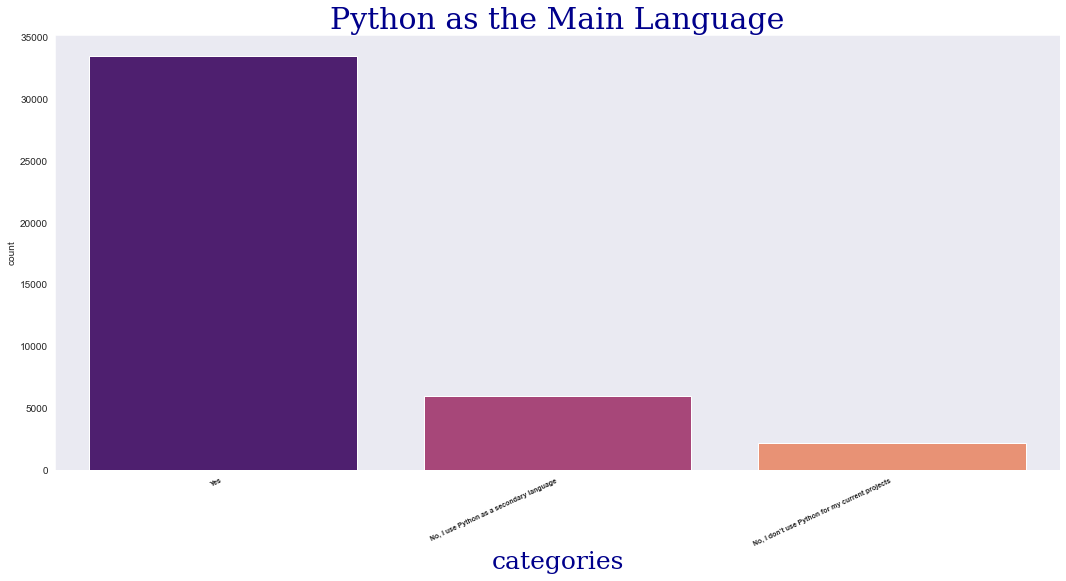

In [6]:
titlefont = {'color':'darkblue',
            'family':'serif',
            'size':30}

labelfont = {'color':'darkblue',
            'family':'serif',
            'size':25}

plt.figure(figsize=(18,8))
sns.set_style('dark')
plt.title("Python as the Main Language",fontdict=titlefont)
fig = sns.countplot(x=data['is.python.main'],data=data,palette='magma')
fig.set_xlabel("categories",fontdict=labelfont)
plt.xticks(
    rotation=25, 
    horizontalalignment='right',
    fontweight='heavy',
    fontsize='x-small'  
)
plt.show()

Unsurprisingly, an overwhelming majority has Python as their main language.

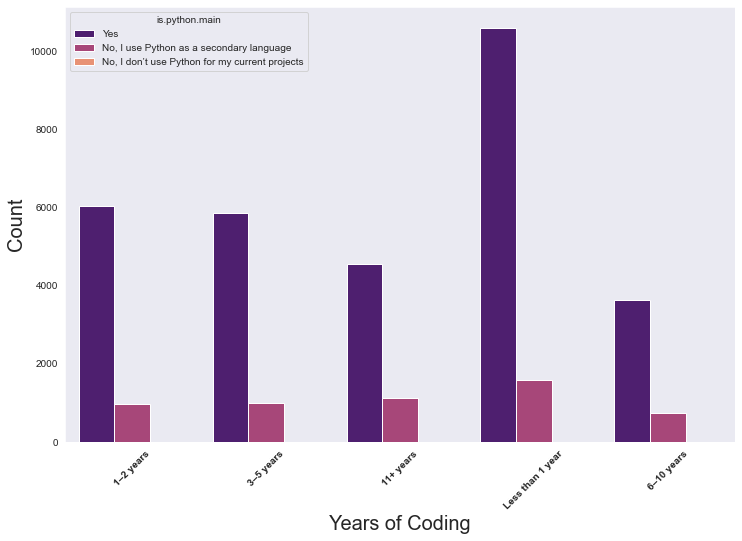

In [7]:
plt.figure(figsize=(12,8))
sns.set_style('dark')
fig = sns.countplot(x='years.of.coding',data=data,hue='is.python.main',palette='magma')
fig.set_xlabel("Years of Coding",fontsize=20)
fig.set_ylabel("Count",fontsize=20)
plt.xticks(rotation=45,fontweight='heavy')
plt.show()

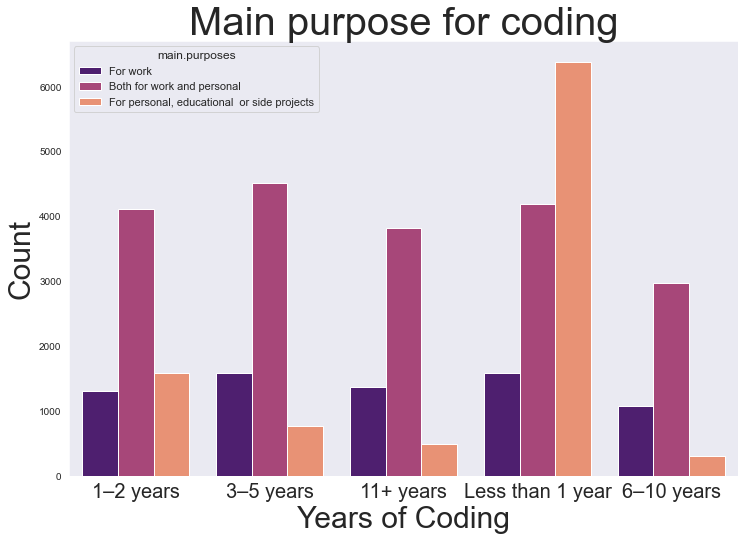

In [8]:
plt.figure(figsize=(12,8))
plt.title("Main purpose for coding",fontsize=40)
sns.set_style('dark')
sns.set()
fig = sns.countplot(x='years.of.coding',data=data,hue='main.purposes',palette='magma')
fig.set_xlabel("Years of Coding",fontsize=30)
fig.set_ylabel("Count",fontsize=30)
plt.xticks(fontsize=20,fontweight="light")
plt.show()

Most people who have been learning python for less than a year spend more time on personal projects. However, developers spend time on both personal and professional projects for the most part.    

<AxesSubplot:title={'center':'Top Services Python is Used For'}, xlabel='count'>

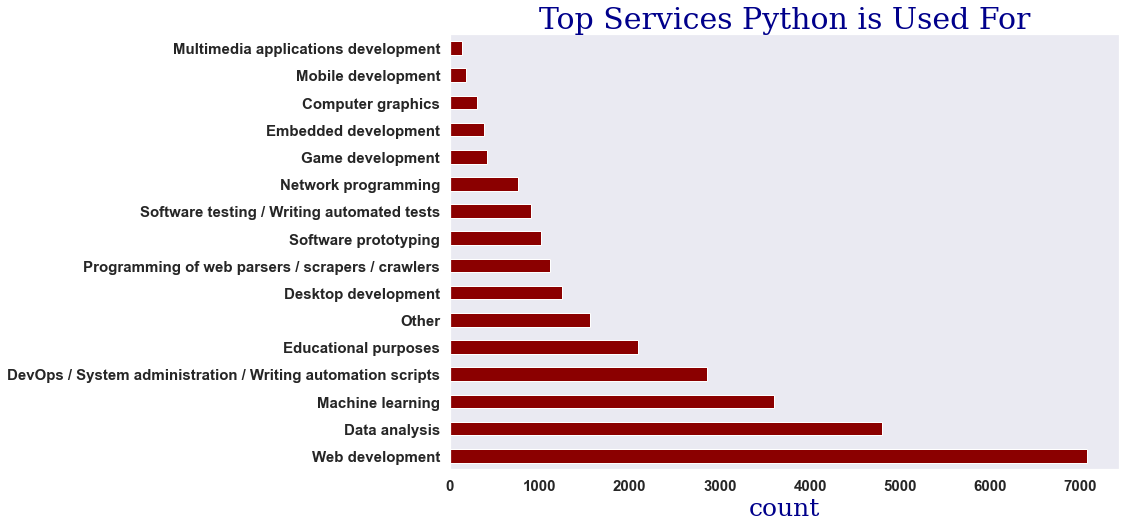

In [9]:
plt.figure(figsize=(12,8))
sns.set_style('dark')
plt.xlabel("count",fontdict=labelfont)
plt.xticks(fontweight='heavy',fontsize=15)
plt.yticks(fontweight='heavy',fontsize=15)
plt.title("Top Services Python is Used For",fontdict=titlefont)
data['use.python.most'].value_counts().plot.barh(color=['darkred'])

Web development, data analysis and machine learning comprise the top uses for python, probably due to the numerous useful libraries that the language hosts. 

In [10]:
type(data['web.frameworks.Django'].value_counts().sum().astype(int))

numpy.int32

In [11]:
def finder(df,text):
    
    """Function to find specific columns. Creates and returns a dictionary of columns and the value counts"""
    dic = {'frameworks':[],'counts':[]}
    for col in df.columns:
        if text in col:
            
            # Select count of the specified framework
            num = df[col].value_counts().sum().astype(int)
            
            # Remove special characters and select unique phrase
            col = col.replace(u'Â\xa0',u'')
            col = col.split('.')[-1]
            
            dic['frameworks'].append(col)
            dic['counts'].append(num)
        else:
            continue
    
    return dic

In [12]:
def plot_categories(dic,title,plotcolor,figsize):
    
    """Function to create dataframe and barplots for a given dictionary"""
    
    # Convert to dataframe and set categories as index:
    res_df = pd.DataFrame(dic)
    res_df = res_df.sort_values(by='counts',ascending=False)
    res_df = res_df.set_index(res_df.columns[0])
    
    #Titlefont and labelfont:
    titlefont = {'color':'darkblue',
            'family':'serif',
            'size':30}

    labelfont = {'color':'darkblue',
            'family':'serif',
            'size':25}
    
    # Create barplot:
    sns.set(font_scale=2)
    res_plot = res_df.plot.barh(color=[plotcolor],figsize=figsize,title=title,fontsize=20)
    return res_plot

## Which are the most popularly used python frameworks in the industry?

<AxesSubplot:title={'center':'Different Web frameworks'}, ylabel='frameworks'>

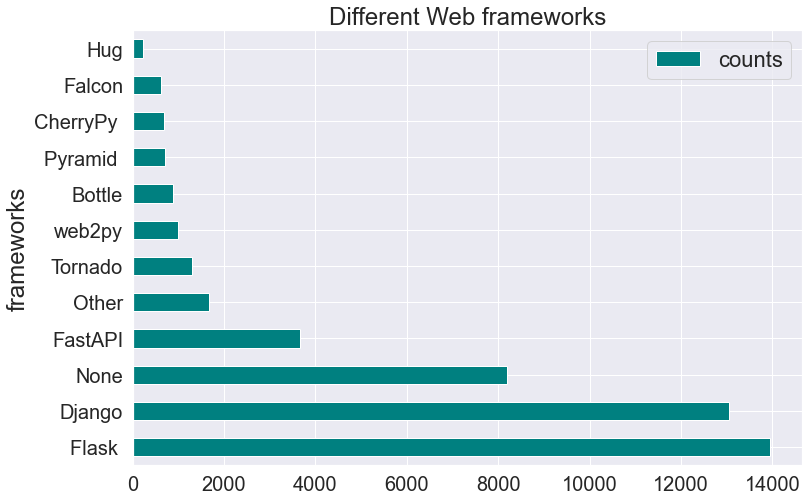

In [13]:
plot_categories(dic=finder(df=data,text='web.frameworks'),title="Different Web frameworks",
               plotcolor="teal",figsize=(12,8))

##### Flask and Django are the most popular python web frameworks. There are quite a few FastAPI users as well. 

## What are the other languages used by python devs? 

<AxesSubplot:title={'center':'Other Languages used by python users'}, ylabel='frameworks'>

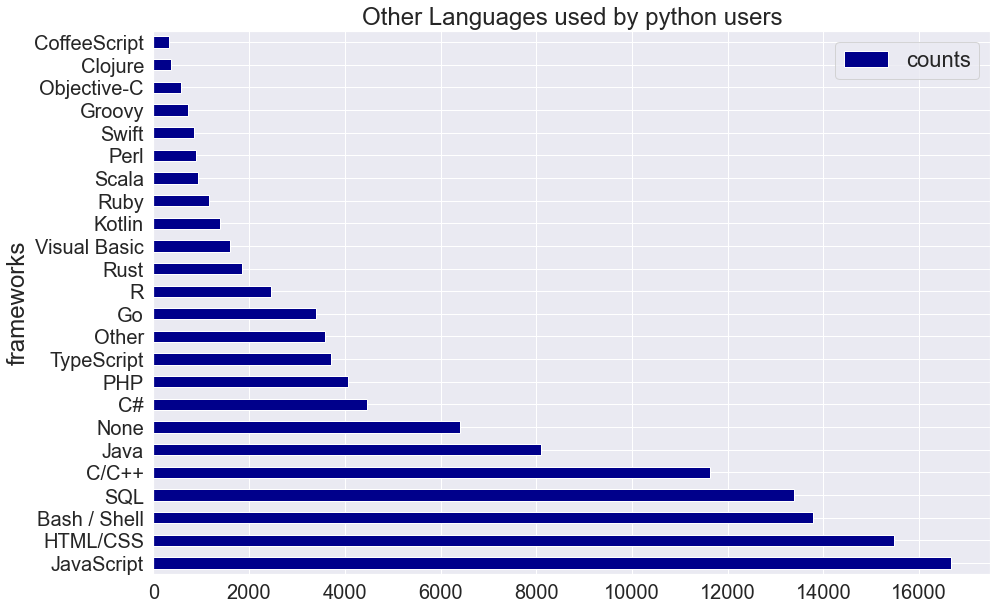

In [14]:
plot_categories(dic=finder(df=data,text='other.lang'),title="Other Languages used by python users",
               plotcolor="darkblue",figsize=(15,10))

##### HTML/CSS and JavaScript are the most popularly used languages. Possibly in web development.  Bash and SQL are also very popular, probably because of the increase in the number  of data analytics and data science aspirants.

## Various purposes Python is used for:

<AxesSubplot:title={'center':'Main uses of python'}, ylabel='frameworks'>

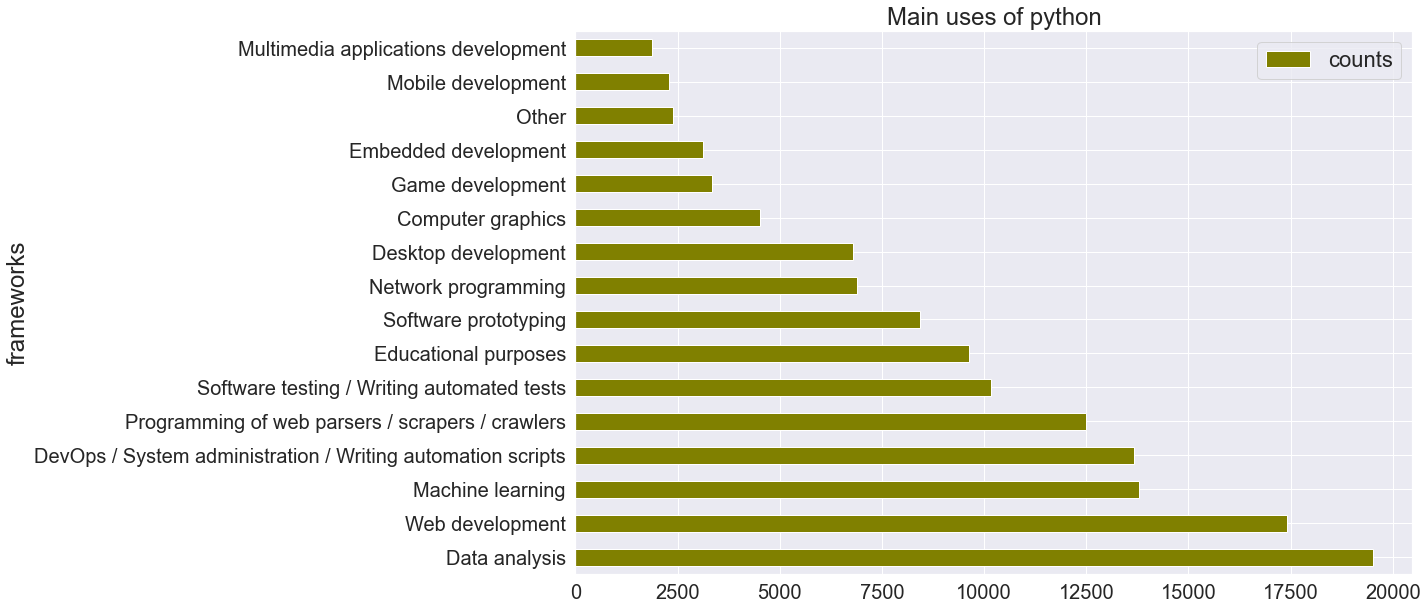

In [15]:
plot_categories(dic=finder(df=data,text='other.purposes'),title="Main uses of python",
               plotcolor="olive",figsize=(15,10))

## What are the frameworks/libaries that are mostly used in data science/analytics?

<AxesSubplot:title={'center':'Main libraries used in Data Science'}, ylabel='frameworks'>

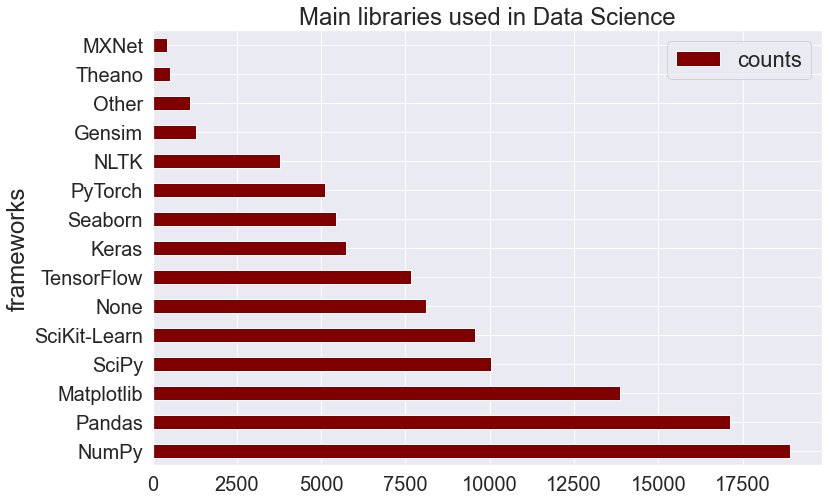

In [16]:
plot_categories(dic=finder(df=data,text='data.frameworks'),title="Main libraries used in Data Science",
               plotcolor="maroon",figsize=(12,8))

##### Numpy, Pandas, matplotlib, scipy and scikit-learn form the 5 most used libraries, which makes sense as these form the cornerstones of any major data science/analytics project. Usage of Deep learning libraries like Keras, tensorflow, Pytorch along NLP libraries like NLTK, Gensim is significantly less in number. 

## What are the most used Cloud Platforms among python devs?

<AxesSubplot:title={'center':'Most Popular Cloud Platforms'}, ylabel='frameworks'>

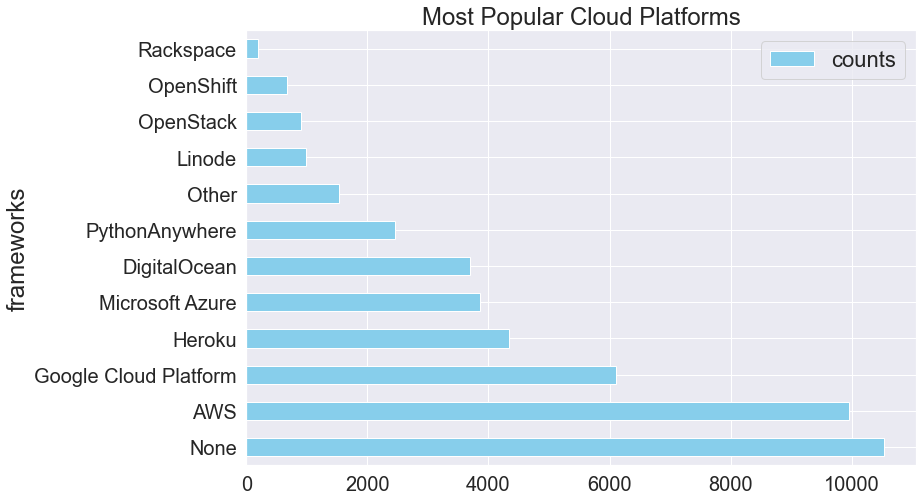

In [17]:
plot_categories(dic=finder(df=data,text='cloud.platform'),title="Most Popular Cloud Platforms",
               plotcolor="skyblue",figsize=(12,8))

## Most popular databases:

<AxesSubplot:title={'center':'Most Popular Databases'}, ylabel='frameworks'>

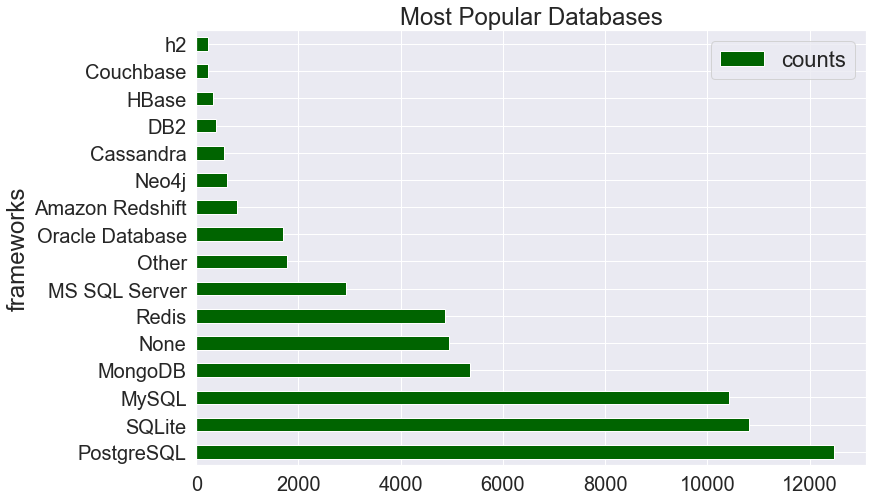

In [18]:
plot_categories(dic=finder(df=data,text='database.'),title="Most Popular Databases",
               plotcolor="darkgreen",figsize=(12,8))

## Most popular Unittest modules:

<AxesSubplot:title={'center':'Most Popular Unittest modules'}, ylabel='frameworks'>

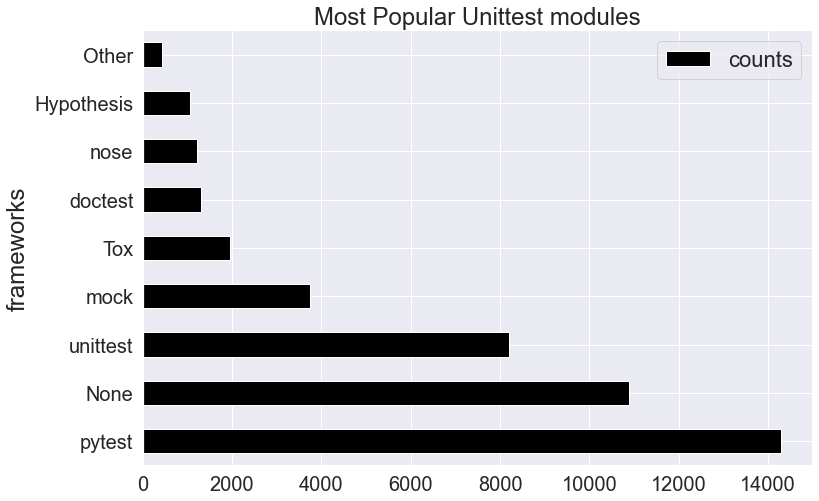

In [19]:
plot_categories(dic=finder(df=data,text='unittesting.'),title="Most Popular Unittest modules",
               plotcolor="black",figsize=(12,8))

## Ranking countries with the most python devs and in different age groups:

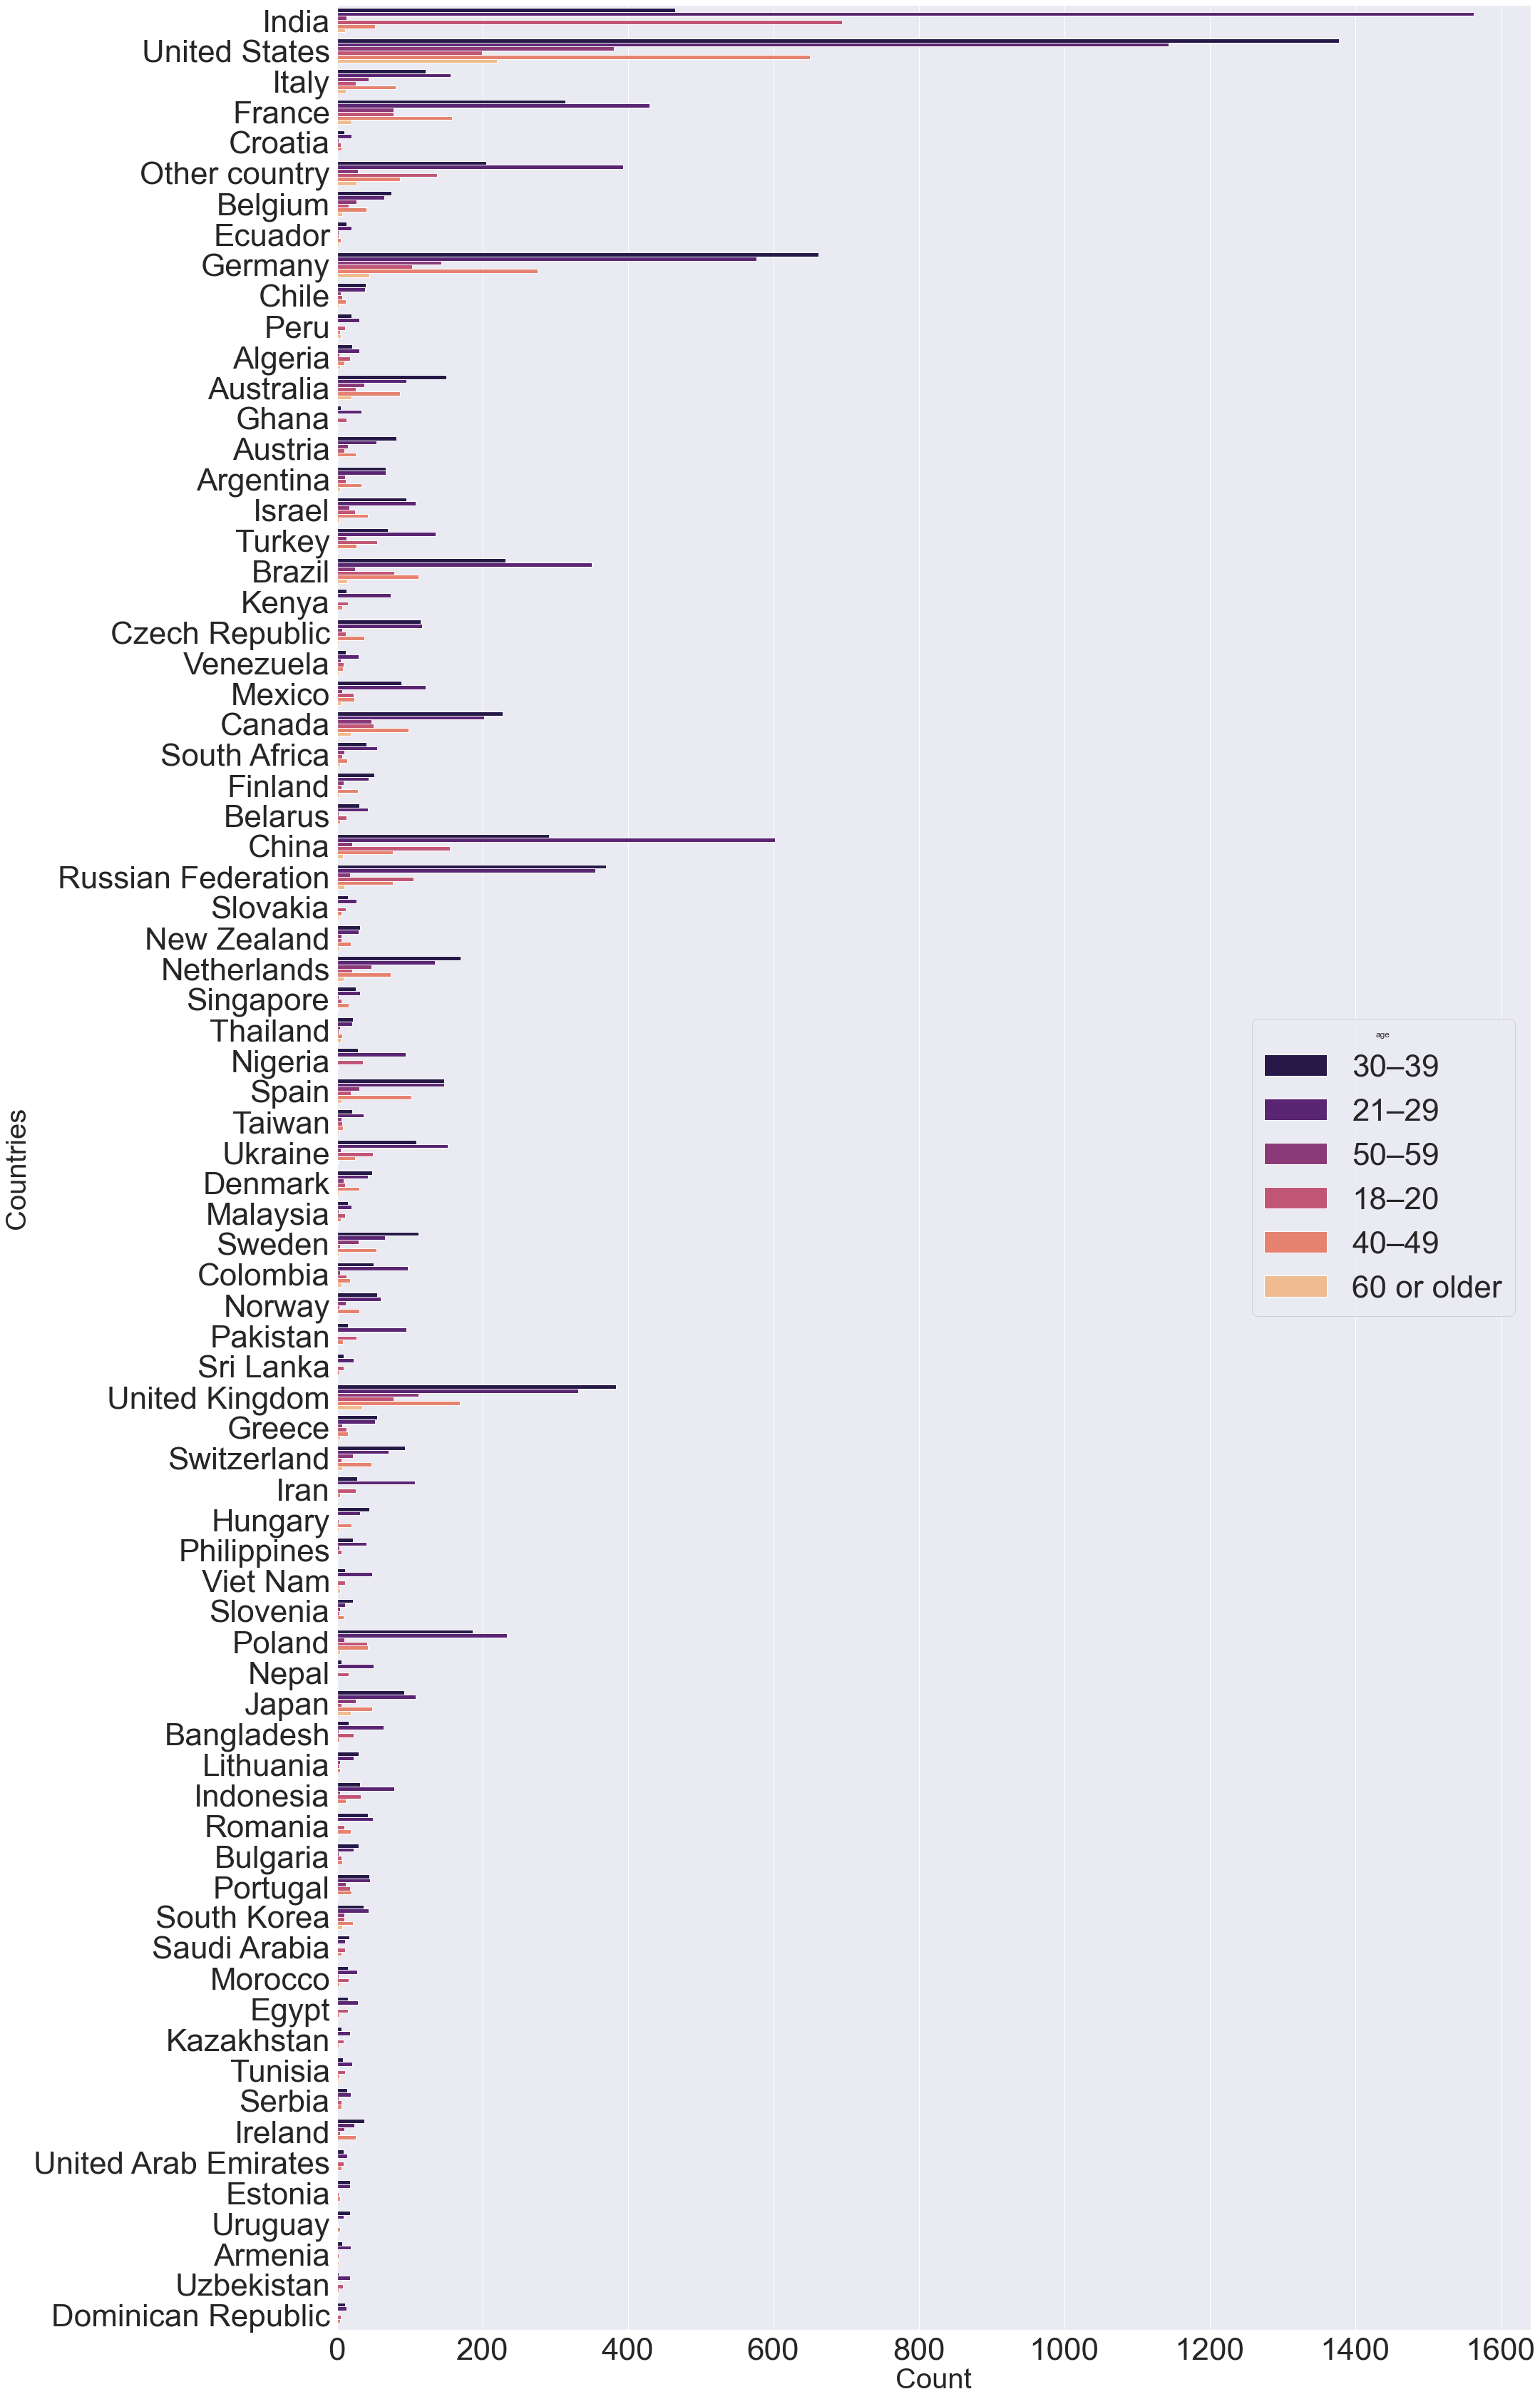

In [20]:
plt.figure(figsize=(30,60))
sns.set_style('dark')
sns.set(font_scale=4)
fig = sns.countplot(y='country.live',data=data,hue='age',palette='magma')
fig.set_xlabel("Count",fontsize=40)
fig.set_ylabel("Countries",fontsize=40)
plt.show()

<AxesSubplot:title={'center':'Job Roles'}, ylabel='frameworks'>

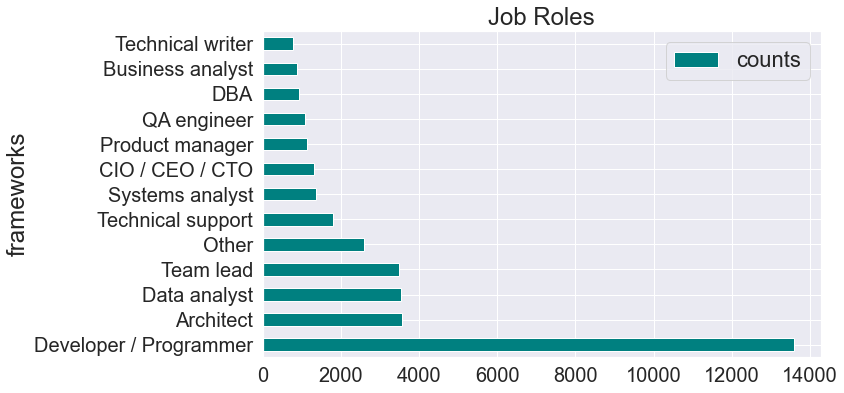

In [21]:
plot_categories(dic=finder(df=data,text='job.role'),title="Job Roles",
               plotcolor="teal",figsize=(10,6))

## Which modules are used for creating isolated virtual envirronments?

<AxesSubplot:title={'center':'Method of creating Virtual Environments'}, ylabel='frameworks'>

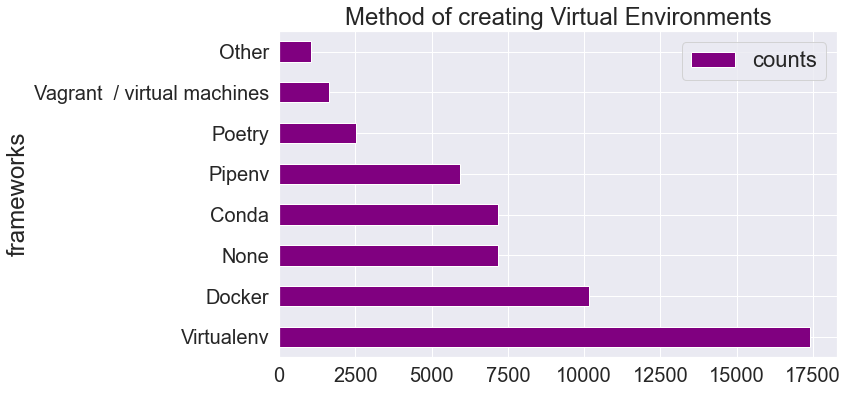

In [22]:
plot_categories(dic=finder(df=data,text='isolate.environments.'),title="Method of creating Virtual Environments",
               plotcolor="purple",figsize=(10,6))

Mostly people use virtualenv and docker. There are quite a lot of people using Conda environments to create isolated workspaces.

# Key takeaways from the analysis:

* Most of the participants of the survey listed Python as their main working language.


* Participants having <1 year of experience form the largest proportion of the survey, this is a good indicator of the popularity of Python in recent years, particularly in the fields of web development, data analytics and machine learning. the other popular languages used by python programmers are Javescrript, HTML, CSS and SQL which further asserts the same.


* Among the web framework modules, Flask and Django are the most popular. Recently FastAPI has seen an increase in popularity as well.


* When it comes to data analytics/data science, the popularly used python libraries are Numpy, Pandas, Matplotlib, Scipy and Scikit-learn. Unsurprisingly, these form the cornerstones of the field, as it is largely comprised of analysing and complex raw datasets, creating insightful visualisations and modelling in  order to get a better idea about the business problem.


* Among the devs who use cloud platforms, the popular ones are: Google Cloud Platform, Amazon AWS, Heroku and Microsoft Azure.


* The most used database management systems are MySQL, PostgreSQL, SQLite and NoSQL platforms like MongoDB.


* Pytest is the most popular testing module, probably because of significantly reduced boilerplate code as compared to unittest.


* Developers aged 21-40 form the vast majority of the kaggle demographic. Most likely factor is probably the rise of the internet age, and the abundance of tutorials available. India has the highest personel, again due to the vast population and increase in internet usage.

* Majority have the job role of a vanilla developer. Specialised devs working in different niche areas of the IT umbrella are significantly less in number.